# Decision Tree Worksheet

In [2]:
import numpy as np
import pandas as po
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt

## Loading data

Load Pima diabetes dataset and split data, with test size 20% and validaton 20%.

In [60]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

## YOUR CODE HERE
data = po.read_csv(url, names = names)

invalid = ['plas', 'pres', 'skin', 'test', 'mass']
for i in invalid:
  data[i].replace(to_replace = 0, value = np.nan, inplace = True)
data = data.dropna(axis=0).reset_index(drop=True)

x_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col = 'class'

test_and_validation_size=0.2
x_train, x_test, y_train, y_test = train_test_split(data[x_cols], data[y_col], test_size = test_and_validation_size, random_state = 1)
x_train, x_val, y_train, y_val = train_test_split(data[x_cols], data[y_col], test_size = test_and_validation_size, random_state = 1)


## Creating Model

Make a model using sklearn's DecisionTreeClassifier, with a high max-depth and low minimum sample leafs.

In [83]:
## YOUR CODE HERE
model = DecisionTreeClassifier(criterion = 'gini', random_state = None, max_depth = 500, min_samples_leaf = 1)
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=500, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Print accuracy of training and validation data.

In [84]:
## YOUR CODE HERE
y_train_pred = model.predict(x_train)
print('Training accuracy is', accuracy_score(y_train, y_train_pred)*100)
y_val_pred = model.predict(x_val)
print('Validation accuracy is', accuracy_score(y_val, y_val_pred)*100)

Training accuracy is 100.0
Validation accuracy is 67.08860759493672


Make a model with a low max-depth and higher minimum sample leafs.

In [82]:
## YOUR CODE HERE
model2 = DecisionTreeClassifier(criterion = 'gini', random_state = None, max_depth = 4, min_samples_leaf = 4)
model2.fit(x_train, y_train)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


Print accuracy of training and validation data.

In [76]:
## YOUR CODE HERE
y_train_pred = model2.predict(x_train)
print('Training accuracy is', accuracy_score(y_train, y_train_pred*100))
y_val_pred = model2.predict(x_val)
print('Validation accuracy is', accuracy_score(y_val, y_val_pred)*100)

Training accuracy is 0.5718849840255591
Validation accuracy is 74.68354430379746


Explain the accuracy results below. 

High max depth leads to overfitting to the training set and poor performance during validation. Lower max depth and higher minimum samples per leaf reduces training set fit but provides more valid model in the wild, corresponding with higher performance on the validation set.

## Metrics

Plot the ROC curve and print the AUC of the second model.

TypeError: ignored

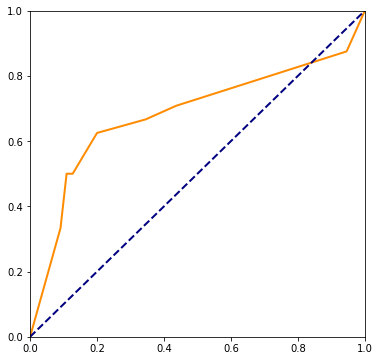

In [116]:
## YOUR CODE HERE
labels = [0,1]
y_val_prob = model2.predict_proba(x_val, labels)

# Calculate the FPR and TPR at varying thresholds (assume label 1 is the "postive" class)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Use graphviz to visualize your 2nd tree.

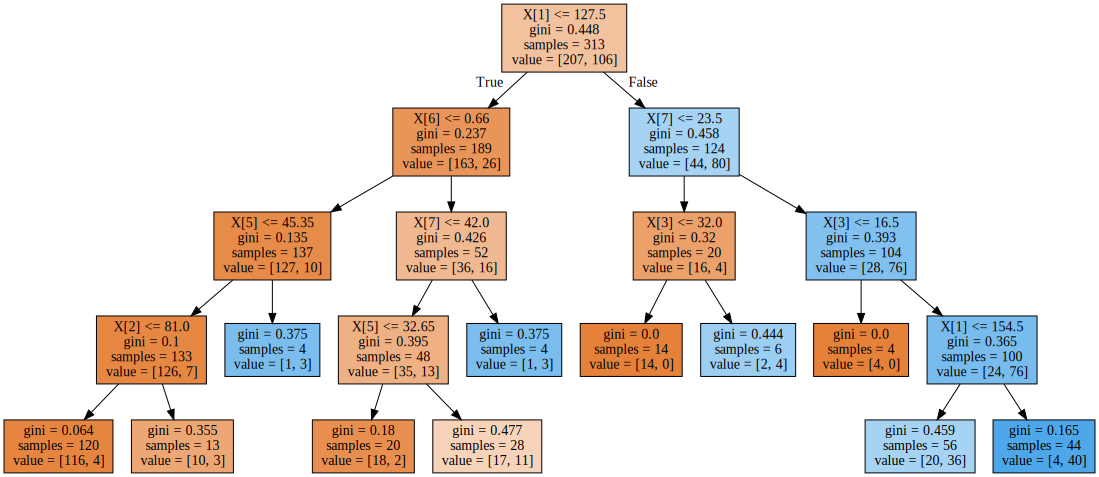

In [81]:
## YOUR CODE HERE
dot_data = tree.export_graphviz(model2, out_file = None, filled = True)

graph = graphviz.Source(dot_data)
graph

#### Use the graph above to answer the questions below

Question 1: What do you think X[n] represents in the nodes from the graph?

The specific feature/column being considered at each node

Question 2: What is the root feature? Does it make sense as the root feature?

Blood plasma levels. Perhaps, depending on how linked it is to diabetes in a biological/clinical sense.

Question 3: If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

Test accuracy would drop, but training accuracy would be at or near 100.

**Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and validation data**

In [85]:
## YOUR CODE HERE
y_train_pred = model.predict(x_train)
print('Training accuracy is', accuracy_score(y_train, y_train_pred)*100)
y_val_pred = model.predict(x_val)
print('Validation accuracy is', accuracy_score(y_val, y_val_pred)*100)

Training accuracy is 100.0
Validation accuracy is 67.08860759493672


# Random Forest

## Creating Model

Create a model with sklearn's RandomForestClassifier and predict values on your validation set.

In [88]:
## YOUR CODE HERE
forest_model = RandomForestClassifier(n_estimators = 100)
forest_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Print accuracy of training and validation data.

In [104]:
## YOUR CODE HERE
y_train_pred = forest_model.predict(x_train)
print('Training accuracy is', accuracy_score(y_train, y_train_pred)*100)
y_val_pred = forest_model.predict(x_val)
print('Validation accuracy is', accuracy_score(y_val, y_val_pred)*100)


Training accuracy is 100.0
Validation accuracy is 77.21518987341773


How did the accuracy compare to the decision tree's accuracy?

Seems as though the model is overfit to the training data, but the validation accuracy was higher than both decision tree models' accuracies.

Print the 3 most important features (hint: sklearn has an attribute to help you find these)

In [100]:
## YOUR CODE HERE
importances=forest_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(data.shape[1]-1):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
print("plas, test, mass")

Feature ranking:
1. feature 1 (0.262834)
2. feature 4 (0.141735)
3. feature 5 (0.120096)
4. feature 7 (0.115119)
5. feature 6 (0.101364)
6. feature 3 (0.089682)
7. feature 0 (0.088815)
8. feature 2 (0.080354)
plas, test, mass


Find the accuracy for random forests with 1 to 100 trees, counting by 5. Print and then plot these accuracies.

Validation accuracy is 73.41772151898735
Validation accuracy is 75.9493670886076
Validation accuracy is 72.15189873417721
Validation accuracy is 77.21518987341773
Validation accuracy is 74.68354430379746
Validation accuracy is 77.21518987341773
Validation accuracy is 75.9493670886076
Validation accuracy is 75.9493670886076
Validation accuracy is 79.74683544303798
Validation accuracy is 73.41772151898735
Validation accuracy is 74.68354430379746
Validation accuracy is 79.74683544303798
Validation accuracy is 72.15189873417721
Validation accuracy is 75.9493670886076
Validation accuracy is 74.68354430379746
Validation accuracy is 73.41772151898735
Validation accuracy is 75.9493670886076
Validation accuracy is 75.9493670886076
Validation accuracy is 73.41772151898735
Validation accuracy is 74.68354430379746


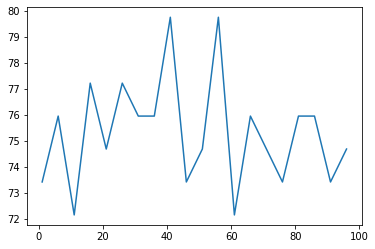

In [110]:
## YOUR CODE HERE
trees = []
accuracies = []
for i in range(1, 100, 5):
  trees.append(i)
  forest_model = RandomForestClassifier(n_estimators = i)
  forest_model.fit(x_train, y_train)
  y_val_pred = forest_model.predict(x_val)
  print('Validation accuracy is', accuracy_score(y_val, y_val_pred)*100)
  accuracies.append(accuracy_score(y_val, y_val_pred)*100)
plt.plot(trees, accuracies); plt.xlabel = "number trees"; plt.ylabe = "accuracy"

Plot the roc_curve using predict_proba a function for our random forest model, and metrics.roc_curve

It might help to google these functions and look at sklearn's documentation.

In [117]:
## YOUR CODE HERE
labels = [0,1]
y_val_prob = forest_model.predict_proba(x_val, labels)

# Calculate the FPR and TPR at varying thresholds (assume label 1 is the "postive" class)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

TypeError: ignored